In [66]:
import pandas as pd
import numpy as np
import math
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")

In [59]:
N = 256
tiempo = np.arange(N)
ciclos = 2
amplitud = 1
senoidal = [amplitud*math.sin(ciclos*2*math.pi*ti/N) for ti in tiempo]
nivelruidouniforme = np.random.uniform(-0.5,0.5,N)
df_seno2 = pd.DataFrame({'tiempo': tiempo, 'senoidal': senoidal, 'ruido': nivelruidouniforme})

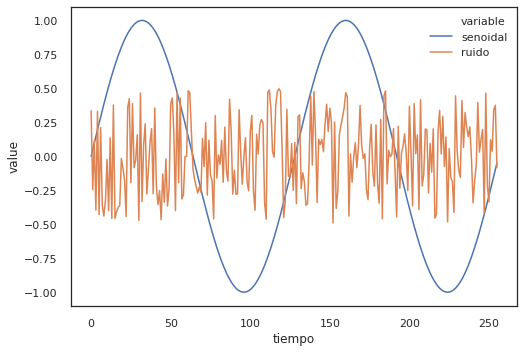

In [60]:
sns.lineplot(x="tiempo", y="value", hue='variable', data=pd.melt(df_seno2, 'tiempo'))

In [62]:
df_seno2['suma'] = df_seno2['senoidal'] + df_seno2['ruido']

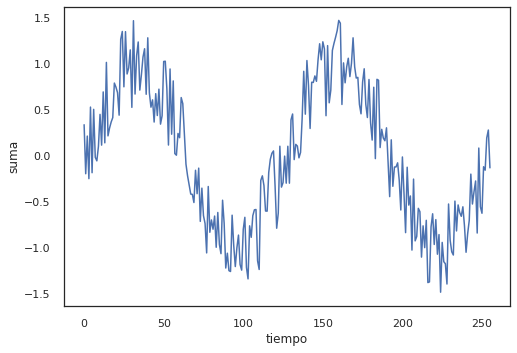

In [63]:
sns.lineplot(x="tiempo", y="suma", data=df_seno2)

In [100]:
#rep(1/3,3) == [1/3]*3
df_seno2['MA3'] = df_seno2.suma.rolling(window=3,center=True,min_periods=2).mean()
df_seno2['MA7'] = df_seno2.suma.rolling(window=7,center=True,min_periods=4).mean()
df_seno2['MA15'] = df_seno2.suma.rolling(window=15,center=True,min_periods=8).mean()
df_seno2['MA25'] = df_seno2.suma.rolling(window=25,center=True,min_periods=13).mean()

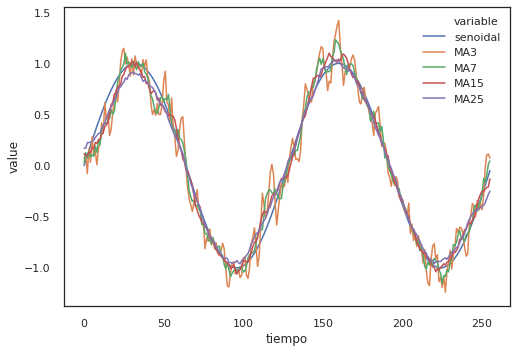

In [123]:
sns.lineplot(x="tiempo", y="value", hue='variable', data=pd.melt(df_seno2.loc[:,~df_seno2.columns.isin(['ruido', 'suma'])], 'tiempo'))

In [136]:
df_fft = pd.DataFrame({
    'tiempo': tiempo,
    'suma_mod': np.abs(fft(df_seno2['suma'].values)),
    'MA3_mod': np.abs(fft(df_seno2['MA3'].values)),
    'MA7_mod': np.abs(fft(df_seno2['MA7'].values)),
    'MA15_mod': np.abs(fft(df_seno2['MA15'].values)),
    'MA25_mod': np.abs(fft(df_seno2['MA25'].values))
})

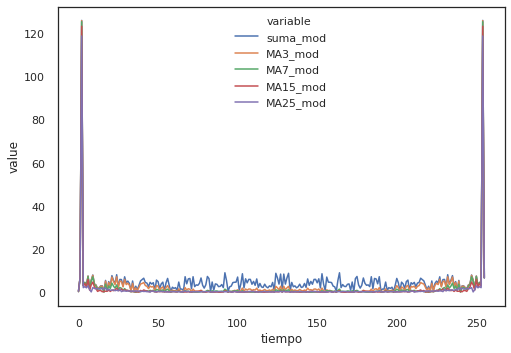

In [138]:
sns.lineplot(x="tiempo", y="value", hue='variable', data=pd.melt(df_fft, 'tiempo'))

In [142]:
df_resp = pd.DataFrame({
    'tiempo': tiempo,
    'ma3': [1/3] * 3 + [0] * 253,
    'ma7': [1/7] * 7 + [0] * 249,
    'ma15': [1/15] * 15 + [0] * 241,
    'ma25': [1/25] * 25 + [0] * 231,
})

In [143]:
df_resp['ma3_mod'] = np.abs(fft(df_resp['ma3'].values))
df_resp['ma7_mod'] = np.abs(fft(df_resp['ma7'].values))
df_resp['ma15_mod'] = np.abs(fft(df_resp['ma15'].values))
df_resp['ma25_mod'] = np.abs(fft(df_resp['ma25'].values))

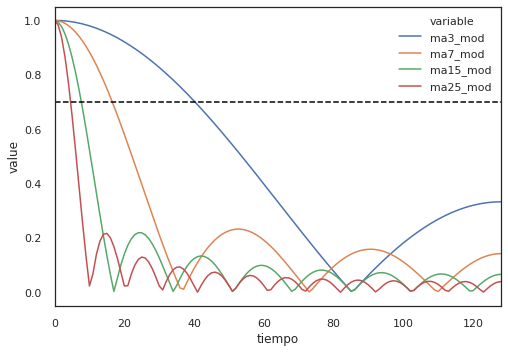

In [149]:
g = sns.lineplot(x="tiempo", y="value", hue='variable', data=pd.melt(df_resp.loc[:,~df_resp.columns.isin(['ma3', 'ma7', 'ma15', 'ma25'])], 'tiempo'))
g.set(xlim=(0, N/2))
plt.plot([0, N], [0.7, 0.7], linestyle='dashed',color='black')